Music Genre Classification<br/>
IST 691 - Group 6<br/>
Mike DeMaria, Noah Goldie, Wei Liao, Nien Tzu Shih

# Supervisied ML - 30 Second Samples

30 Second Samples

In [ ]:
import pandas as pd
!wget -np -A "*.csv" https://nand.net/mdemaria/ist691/Data/features_30_sec.csv

df = pd.read_csv('./features_30_sec.csv')
df.head(5)

--2023-12-07 18:21:27--  https://nand.net/mdemaria/ist691/Data/features_30_sec.csv
Resolving nand.net (nand.net)... 172.234.18.65, 2600:3c06::f03c:93ff:feab:e4a1
Connecting to nand.net (nand.net)|172.234.18.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1108271 (1.1M) [text/csv]
Saving to: ‘features_30_sec.csv.1.tmp.2’

features_30_sec.csv 100%[===================>]   1.06M  --.-KB/s    in 0.07s   

2023-12-07 18:21:27 (15.1 MB/s) - ‘features_30_sec.csv.1.tmp.2’ saved [1108271/1108271]



,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Setup

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(['filename', 'label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.265
Classification Report:
              precision    recall  f1-score   support

       blues       0.17      0.10      0.12        21
   classical       0.31      1.00      0.48        11
     country       0.24      0.20      0.22        25
       disco       0.26      0.57      0.36        14
      hiphop       0.08      0.07      0.07        15
        jazz       0.13      0.14      0.14        21
       metal       0.48      0.41      0.44        27
         pop       0.29      0.32      0.30        22
      reggae       0.25      0.19      0.22        21
        rock       0.50      0.04      0.08        23

    accuracy                           0.27       200
   macro avg       0.27      0.30      0.24       200
weighted avg       0.28      0.27      0.24       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.645
Classification Report:
              precision    recall  f1-score   support

       blues       0.57      0.57      0.57        21
   classical       0.85      1.00      0.92        11
     country       0.70      0.56      0.62        25
       disco       0.47      0.64      0.55        14
      hiphop       0.50      0.53      0.52        15
        jazz       0.65      0.71      0.68        21
       metal       0.80      0.74      0.77        27
         pop       1.00      0.91      0.95        22
      reggae       0.59      0.62      0.60        21
        rock       0.33      0.30      0.32        23

    accuracy                           0.65       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.65      0.65      0.65       200



Random Forest

Is this overfitting?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=50)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

       blues       0.74      0.81      0.77        21
   classical       0.85      1.00      0.92        11
     country       0.74      0.68      0.71        25
       disco       0.67      0.86      0.75        14
      hiphop       0.65      0.73      0.69        15
        jazz       0.79      0.90      0.84        21
       metal       0.89      0.93      0.91        27
         pop       0.95      0.91      0.93        22
      reggae       0.80      0.76      0.78        21
        rock       0.77      0.43      0.56        23

    accuracy                           0.79       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.79      0.79      0.78       200



Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

model4 = SVC()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.215
Classification Report:
              precision    recall  f1-score   support

       blues       0.33      0.05      0.08        21
   classical       0.27      1.00      0.42        11
     country       0.50      0.04      0.07        25
       disco       0.15      0.64      0.24        14
      hiphop       0.08      0.07      0.07        15
        jazz       0.33      0.14      0.20        21
       metal       0.25      0.22      0.24        27
         pop       0.26      0.23      0.24        22
      reggae       0.22      0.29      0.25        21
        rock       0.00      0.00      0.00        23

    accuracy                           0.21       200
   macro avg       0.24      0.27      0.18       200
weighted avg       0.25      0.21      0.17       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=10)
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

       blues       0.27      0.33      0.30        21
   classical       0.43      0.91      0.59        11
     country       0.19      0.20      0.19        25
       disco       0.12      0.21      0.15        14
      hiphop       0.18      0.27      0.22        15
        jazz       0.36      0.24      0.29        21
       metal       0.45      0.19      0.26        27
         pop       0.36      0.36      0.36        22
      reggae       0.32      0.38      0.35        21
        rock       0.20      0.04      0.07        23

    accuracy                           0.28       200
   macro avg       0.29      0.31      0.28       200
weighted avg       0.29      0.28      0.26       200



# Supervisied ML - 3 Second Samples

Setup

In [ ]:
!wget -np -A "*.csv" https://nand.net/mdemaria/ist691/Data/features_3_sec.csv
df2 = pd.read_csv('./features_3_sec.csv')
df2.head(5)

--2023-12-07 18:21:40--  https://nand.net/mdemaria/ist691/Data/features_3_sec.csv
Resolving nand.net (nand.net)... 172.234.18.65, 2600:3c06::f03c:93ff:feab:e4a1
Connecting to nand.net (nand.net)|172.234.18.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11075018 (11M) [text/csv]
Saving to: ‘features_3_sec.csv.1.tmp’

features_3_sec.csv. 100%[===================>]  10.56M  --.-KB/s    in 0.1s    

2023-12-07 18:21:40 (87.4 MB/s) - ‘features_3_sec.csv.1.tmp’ saved [11075018/11075018]



,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.265
Classification Report:
              precision    recall  f1-score   support

       blues       0.17      0.10      0.12        21
   classical       0.31      1.00      0.48        11
     country       0.24      0.20      0.22        25
       disco       0.26      0.57      0.36        14
      hiphop       0.08      0.07      0.07        15
        jazz       0.13      0.14      0.14        21
       metal       0.48      0.41      0.44        27
         pop       0.29      0.32      0.30        22
      reggae       0.25      0.19      0.22        21
        rock       0.50      0.04      0.08        23

    accuracy                           0.27       200
   macro avg       0.27      0.30      0.24       200
weighted avg       0.28      0.27      0.24       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.595
Classification Report:
              precision    recall  f1-score   support

       blues       0.46      0.57      0.51        21
   classical       0.73      1.00      0.85        11
     country       0.59      0.40      0.48        25
       disco       0.44      0.50      0.47        14
      hiphop       0.38      0.53      0.44        15
        jazz       0.71      0.71      0.71        21
       metal       0.79      0.70      0.75        27
         pop       1.00      0.86      0.93        22
      reggae       0.55      0.57      0.56        21
        rock       0.32      0.26      0.29        23

    accuracy                           0.59       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.61      0.59      0.59       200



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=50)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

       blues       0.82      0.86      0.84        21
   classical       0.79      1.00      0.88        11
     country       0.64      0.56      0.60        25
       disco       0.71      0.86      0.77        14
      hiphop       0.67      0.80      0.73        15
        jazz       0.80      0.76      0.78        21
       metal       0.89      0.93      0.91        27
         pop       1.00      0.91      0.95        22
      reggae       0.68      0.71      0.70        21
        rock       0.65      0.48      0.55        23

    accuracy                           0.77       200
   macro avg       0.76      0.79      0.77       200
weighted avg       0.77      0.77      0.77       200



Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

model4 = SVC()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.215
Classification Report:
              precision    recall  f1-score   support

       blues       0.33      0.05      0.08        21
   classical       0.27      1.00      0.42        11
     country       0.50      0.04      0.07        25
       disco       0.15      0.64      0.24        14
      hiphop       0.08      0.07      0.07        15
        jazz       0.33      0.14      0.20        21
       metal       0.25      0.22      0.24        27
         pop       0.26      0.23      0.24        22
      reggae       0.22      0.29      0.25        21
        rock       0.00      0.00      0.00        23

    accuracy                           0.21       200
   macro avg       0.24      0.27      0.18       200
weighted avg       0.25      0.21      0.17       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=10)
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

       blues       0.27      0.33      0.30        21
   classical       0.43      0.91      0.59        11
     country       0.19      0.20      0.19        25
       disco       0.12      0.21      0.15        14
      hiphop       0.18      0.27      0.22        15
        jazz       0.36      0.24      0.29        21
       metal       0.45      0.19      0.26        27
         pop       0.36      0.36      0.36        22
      reggae       0.32      0.38      0.35        21
        rock       0.20      0.04      0.07        23

    accuracy                           0.28       200
   macro avg       0.29      0.31      0.28       200
weighted avg       0.29      0.28      0.26       200



# Basic ANN as Benchmark

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from google.colab.drive import mount

In [ ]:
!wget -np -A "*.csv" https://nand.net/mdemaria/ist691/Data/features_30_sec.csv

# Replace this filepath with your own
df = pd.read_csv('./features_30_sec.csv')

--2023-12-07 18:23:06--  https://nand.net/mdemaria/ist691/Data/features_30_sec.csv
Resolving nand.net (nand.net)... 172.234.18.65, 2600:3c06::f03c:93ff:feab:e4a1
Connecting to nand.net (nand.net)|172.234.18.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1108271 (1.1M) [text/csv]
Saving to: ‘features_30_sec.csv.1.tmp.4’

features_30_sec.csv 100%[===================>]   1.06M  --.-KB/s    in 0.07s   

2023-12-07 18:23:06 (14.6 MB/s) - ‘features_30_sec.csv.1.tmp.4’ saved [1108271/1108271]



In [ ]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
print(df.dtypes)

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

Feed Forward Network

In [ ]:
df = df.drop('filename', axis=1)
X = df.drop('label', axis=1)
y = df['label']

# Encode the labels for multi-class classification
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Number of classes
num_classes = len(label_encoder.classes_)

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 2.1159 - accuracy: 0.2516 - val_loss: 1.9297 - val_accuracy: 0.3562
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 1.6758 - accuracy: 0.4563 - val_loss: 1.6037 - val_accuracy: 0.4250
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 1.3512 - accuracy: 0.5359 - val_loss: 1.3433 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 1.1207 - accuracy: 0.6297 - val_loss: 1.1974 - val_accuracy: 0.5562
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.9465 - accuracy: 0.7000 - val_loss: 1.0849 - val_accuracy: 0.6250
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.8061 - accuracy: 0.7250 - val_loss: 1.0255 - val_accuracy: 0.6375
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.7828 - val_loss: 0.9813 - val_accuracy: 0.6500
Epoch 8/10
20/20 [=

# Spectrogram Generation

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
!pip install pydub
from pydub import AudioSegment
from pydub.utils import make_chunks

# This block is used to split the 30 second waveforms into three 10 second waveforms,
# and to generate the mel spectrographs.  As we've converted and saved the files,
# you don't need to do this again, since you can download all the audio and images
# at https://nand.net/mdemaria/ist691/Data/

# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.display.specshow.html
# STFT power spectrum
# Similar to set in GTZAN, with Hz on the y axis
def generate_image_STFTPowerSpectrum(readpath, writepath):
	y, sr = librosa.load(readpath)

	spec = np.abs(librosa.stft(y, hop_length=512))
	spec = librosa.amplitude_to_db(spec, ref=np.max)
	librosa.display.specshow(spec, sr=sr );

	plt.savefig(writepath)

# Chromagram with pitch class
# y axis is based on pitch
def generate_image_Chromagram(readpath, writepath):
	y, sr = librosa.load(readpath)

	C = librosa.feature.chroma_cqt(y=y, sr=sr)
	librosa.display.specshow(C)

	plt.savefig(writepath)


# Function to process one genre
def process_genre(split10, genre):
	directory_source = './genres_original/' + genre;
	directory_dest_sftp = './images_SFPT/'
	directory_dest_pitch = './images_Pitch/'

	if(split10 == True):
		directory_source = './genres_10sec/' + genre;
		directory_dest_sftp = './images_10sec_SFPT/'
		directory_dest_pitch = './images_10sec_Pitch/'


	for filename in os.listdir(directory_source):
		read_file_path = os.path.join(directory_source, filename)
		save_file_path_SFTP = directory_dest_sftp + genre + '/' + filename[:-3] + 'png';
		save_file_path_Pitch = directory_dest_pitch + genre + '/' + filename[:-3] + 'png';
		print('read: ' + read_file_path)
		generate_image_STFTPowerSpectrum(read_file_path, save_file_path_SFTP)
		print('save: ' + save_file_path_SFTP)
		generate_image_Chromagram(read_file_path, save_file_path_Pitch)
		print('save: ' + save_file_path_Pitch)


# Split an audio file
# https://stackoverflow.com/questions/36799902/how-to-splice-an-audio-file-wav-format-into-1-sec-splices-in-python?rq=1
# It looks like in a few small cases, it'll split another very small file, probably due to rounding error
# So if we're splitting by 3, any {name}3.wav file should be deleted afterwards
def split_song(genre):
	directory_source = './genres_original/' + genre;
	for filename in os.listdir(directory_source):
		read_file_path = os.path.join(directory_source, filename)
		print(read_file_path)
		myaudio = AudioSegment.from_file(read_file_path , "wav")
		chunk_length_ms = (myaudio.duration_seconds / 3) * 1000 # Cut into 3 chunks
		chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec
		for i, chunk in enumerate(chunks):
			chunk_name = "./genres_10sec/" + genre + "/" + filename + "{0}.wav".format(i)
			chunk.export(chunk_name, format="wav")


# Function to process all genres
# It seems like Python doesn't deallocate memory as it processes through,
# so the memory usage keeps going up and up.  You may need to run these individually instead.
def process_all_genres(split10):
	process_genre(split10, 'blues')
	process_genre(split10, 'classical')
	process_genre(split10, 'country')
	process_genre(split10, 'disco')
	process_genre(split10, 'hiphop')
	process_genre(split10, 'jazz')
	process_genre(split10, 'metal')
	process_genre(split10, 'pop')
	process_genre(split10, 'reggae')
	process_genre(split10, 'rock')

# Function to split all genres into 10 second chunks
def split_all_genres():
	split_song('blues')
	split_song('classical')
	split_song('country')
	split_song('disco')
	split_song('hiphop')
	split_song('jazz')
	split_song('metal')
	split_song('pop')
	split_song('reggae')
	split_song('rock')

# Process individually
#split10 = True
#process_genre(split10, 'blues')
#process_genre(split10, 'classical')
#process_genre(split10, 'country')
#process_genre(split10, 'disco')
#process_genre(split10, 'hiphop')
#process_genre(split10, 'jazz')
#process_genre(split10, 'metal')
#process_genre(split10, 'pop')
#process_genre(split10, 'reggae')
#process_genre(split10, 'rock')

# Process everything.  Comment this line out to *not* convert/split again.
# Given the memory issue mentioned above, this might not be a great idea.
#split_all_genres()
#process_all_genres(False)
#process_all_genres(True)


# CNN Model

In [ ]:
!wget -r -np -A "*.png" https://nand.net/mdemaria/ist691/Data/images_Pitch/
!wget -r -np -A "*.png" https://nand.net/mdemaria/ist691/Data/testing/test_images_Pitch/

Streaming output truncated to the last 5000 lines.
Length: 363451 (355K) [image/png]
Saving to: ‘nand.net/mdemaria/ist691/Data/images_Pitch/jazz/jazz.00094.png’

nand.net/mdemaria/i 100%[===================>] 354.93K  --.-KB/s    in 0.001s  

2023-12-08 14:19:11 (348 MB/s) - ‘nand.net/mdemaria/ist691/Data/images_Pitch/jazz/jazz.00094.png’ saved [363451/363451]

--2023-12-08 14:19:11--  https://nand.net/mdemaria/ist691/Data/images_Pitch/jazz/jazz.00095.png
Reusing existing connection to nand.net:443.
HTTP request sent, awaiting response... 200 OK
Length: 450162 (440K) [image/png]
Saving to: ‘nand.net/mdemaria/ist691/Data/images_Pitch/jazz/jazz.00095.png’

nand.net/mdemaria/i 100%[===================>] 439.61K  --.-KB/s    in 0.001s  

2023-12-08 14:19:11 (367 MB/s) - ‘nand.net/mdemaria/ist691/Data/images_Pitch/jazz/jazz.00095.png’ saved [450162/450162]

--2023-12-08 14:19:11--  https://nand.net/mdemaria/ist691/Data/images_Pitch/jazz/jazz.00096.png
Reusing existing connection to nand.net

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import keras
from tensorflow import keras
from keras.utils import get_file
from keras import preprocessing
from keras import layers
from keras import optimizers
from keras import activations
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

Some extra functions to evaluate the models

In [ ]:
def plot_training(history):
  fig, ax = plt.subplots(3, 1, figsize=(6,10))
  n_epochs = len(history.history['loss'])
  min_loss = min(history.history['val_loss'])
  max_loss = max(history.history['loss'])
  min_acc = min(history.history['val_accuracy'])
  max_acc = max(history.history['val_accuracy'])
  min_3acc = min(history.history['val_top_k_categorical_accuracy'])
  max_3acc = max(history.history['val_top_k_categorical_accuracy'])

  # Loss Graph
  ax[0].plot(history.history['loss'])
  ax[0].plot(history.history['val_loss'])
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].annotate('Minimum Val Loss: ' + str(round(min_loss, 3)), xy = (n_epochs/2, max_loss - 0.1))
  # Accuracy Graph
  ax[1].plot(history.history['accuracy'])
  ax[1].plot(history.history['val_accuracy'])
  ax[1].set_ylim((0,1))
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].annotate('Maximum Val Accuracy: ' + str(round(max_acc, 3)), xy = (n_epochs/2, 0.05))
  # Top 3 Accuracy Graph
  ax[2].plot(history.history['top_k_categorical_accuracy'])
  ax[2].plot(history.history['val_top_k_categorical_accuracy'])
  ax[2].set_ylim((0,1))
  ax[2].set_xlabel('Epoch')
  ax[2].set_ylabel('Top 3 Accuracy')
  ax[2].annotate('Maximum Val Top 3 Accuracy: ' + str(round(max_3acc, 3)), xy = (n_epochs/3, 0.05))

  fig.suptitle('Model Evaluation Metrics')
  fig.legend(['Training', 'Validation'], loc = 'upper right')

def confint(p, n):
  # Standard error of a binomial distribution, based on probability and sample size
  e = np.sqrt(p*(1-p)/n)
  # Calculating lower bound and upper bound based on z-score of 1.96 (95% confidence interval)
  lb = round(p - 1.96*e, 3)
  ub = round(p + 1.96*e, 3)
  return (lb, ub)

In [ ]:
image_directory = './nand.net/mdemaria/ist691/Data/images_Pitch'
image_size = (480, 640)
batch_size = 32

train = preprocessing.image_dataset_from_directory(directory = image_directory,
                                                   label_mode = 'categorical',
                                                   validation_split = 0.2,
                                                   subset = 'training',
                                                   seed = 6910,
                                                   image_size = image_size,
                                                   batch_size = batch_size)

val = preprocessing.image_dataset_from_directory(directory = image_directory,
                                                 label_mode = 'categorical',
                                                 validation_split = 0.2,
                                                 subset = 'validation',
                                                 seed = 6910,
                                                 image_size = image_size,
                                                 batch_size = batch_size)

train = train.prefetch(buffer_size = 32)
val = val.prefetch(buffer_size = 32)


model6 = keras.Sequential(
    [
        keras.Input(shape=(480, 640, 3), batch_size = batch_size),
        layers.Cropping2D(cropping = ((55,52),(78,63))),

        layers.Conv2D(filters = 32, kernel_size = (9,9), padding = 'same'),
        layers.MaxPool2D((2,2)),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Conv2D(filters = 64, kernel_size = (7, 7), padding = 'same'),
        layers.MaxPool2D((2,2)),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Conv2D(filters = 64, kernel_size = (5,5), padding = 'same'),
        layers.MaxPool2D((2,2)),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Conv2D(filters = 16, kernel_size = (1,1), padding = 'same'),
        layers.MaxPool2D((2,2)),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dropout(0.75),

        layers.Dense(256, activation = 'elu'),
        layers.Dropout(0.5),

        layers.Dense(128, activation = 'elu'),
        layers.Dropout(0.5),

        layers.Dense(64, activation = 'elu'),
        layers.Dropout(0.5),

        layers.Dense(32, activation = 'elu'),
        layers.Dropout(0.25),

        layers.Dense(10, activation = 'softmax')
    ]
    )

model6.summary()


learning_rate = 0.00005
epochs = 200

top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(k = 3)

# legacy Adam used as its faster on M1 macs
model6.compile(optimizer = optimizers.legacy.Adam(learning_rate = learning_rate),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy', top_3_accuracy],)


#https://stackoverflow.com/questions/48285129/saving-best-model-in-keras
#from keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint
#from keras.callbacks import ReduceLROnPlateau
#earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=0, mode='min')
#mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_accuracy', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

#model6_history = model6.fit(train, epochs = epochs, validation_data = val, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])
model6_history = model6.fit(train, epochs = epochs, validation_data = val)

Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d (Cropping2D)     (32, 373, 499, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 373, 499, 32)        7808      
                                                                 
 max_pooling2d (MaxPooling2  (32, 186, 249, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (32, 186, 249, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (32, 186, 249, 

Model 6b Confidence Intervals 
Accuracy: (0.667, 0.79) 
Maximum Top 3 Accuracy: (0.876, 0.953)


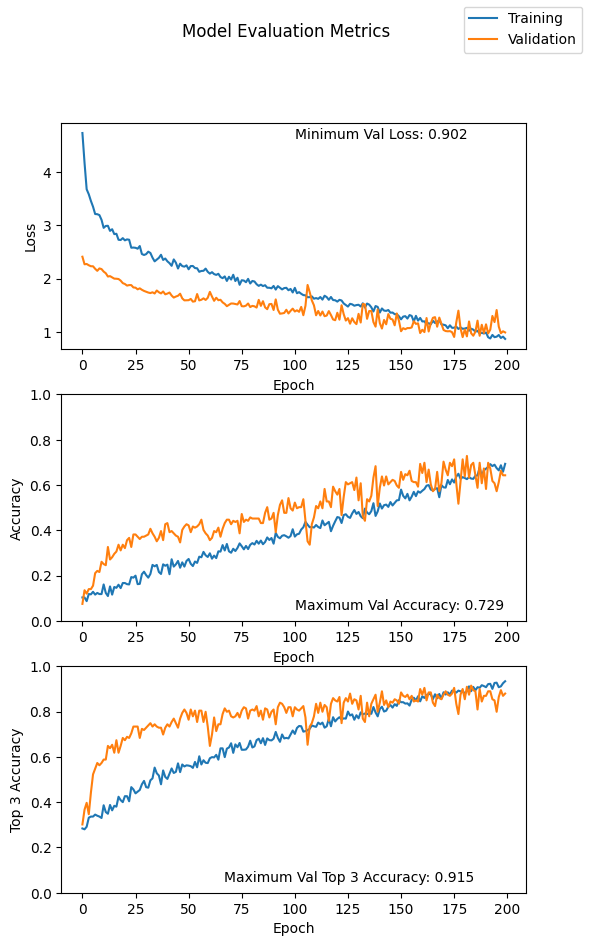

In [ ]:
plot_training(model6_history)

print("Model 6b Confidence Intervals",
      '\nAccuracy:', confint(max(model6_history.history['val_accuracy']), 199),
      '\nMaximum Top 3 Accuracy:', confint(max(model6_history.history['val_top_k_categorical_accuracy']), 199))


model6.save('./model6_colab_200Pitch')

#Model 6b Confidence Intervals
#Accuracy: (0.651, 0.776)
#Maximum Top 3 Accuracy: (0.87, 0.949)


In [ ]:
!tar -cf model6_colab_200Pitch.tar model6_colab_200Pitch

# Predictions

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv

!wget -np -A "*.csv" https://nand.net/mdemaria/ist691/Data/rym_clean1.csv

d = read_csv('rym_clean1.csv')

df = d.values

recommended_by_genre_list = pd.DataFrame()

for line in df:
  process = {}
  process['album_name'] = line[2]
  process['artist'] = line[3]
  process['avg_rating'] = line[9]
  process['rating_count'] = line[10]
  process['review_count'] = line[11]
  process['pblues'] = False
  process['pclassical'] = False
  process['pcountry'] = False
  process['pdisco'] = False
  process['phiphop'] = False
  process['pjazz'] = False
  process['pmetal'] = False
  process['ppop'] = False
  process['preggae'] = False
  process['prock'] = False
  process['sblues'] = False
  process['sclassical'] = False
  process['scountry'] = False
  process['sdisco'] = False
  process['shiphop'] = False
  process['sjazz'] = False
  process['smetal'] = False
  process['spop'] = False
  process['sreggae'] = False
  process['srock'] = False

  # Process Primary Genres
  if(isinstance(line[6], str)):
    if "Blues" in line[6]:
      process['pblues'] = True
    if "Orchestral" in line[6] or "Symphony" in line[6] or "Modern Classical" in line[6]:
      process['pclassical'] = True
    if "Country" in line[6]:
      process['pcountry'] = True
    if "Disco" in line[6] or "Dance" in line[6]:
      process['pdisco'] = True
    if "Hip Hop" in line[6]:
      process['phiphop'] = True
    if "Jazz" in line[6] or "Big Band" in line[6]:
      process['pjazz'] = True
    if "Metal" in line[6]:
      process['pmetal'] = True
    if "Adult Contemporary" in line[6] or "Pop" in line[6]:
      process['ppop'] = True
    if "Reggae" in line[6]:
      process['preggae'] = True
    if "Rock" in line[6]:
      process['prock'] = True

 # Process Secondary Genres
  if(isinstance(line[7], str)):
    if "Blues" in line[7]:
      process['sblues'] = True
    if "Orchestral" in line[7] or "Symphony" in line[7] or "Modern Classical" in line[7]:
      process['sclassical'] = True
    if "Country" in line[7]:
      process['scountry'] = True
    if "Disco" in line[7]:
      process['sdisco'] = True
    if "Hip Hop" in line[7]:
      process['shiphop'] = True
    if "Jazz" in line[7] or "Big Band" in line[7]:
      process['sjazz'] = True
    if "Metal" in line[7]:
      process['smetal'] = True
    if "Adult Contemporary" in line[7] or "Pop" in line[7]:
      process['spop'] = True
    if "Reggae" in line[7]:
      process['sreggae'] = True
    if "Rock" in line[7]:
      process['srock'] = True

  df_process = pd.DataFrame([process])
  recommended_by_genre_list = pd.concat([recommended_by_genre_list, df_process], ignore_index=True)


def find_primary(genre):
  if genre == "clues":
    return recommended_by_genre_list.loc[recommended_by_genre_list['pblues'] == True]
  if genre == "classical":
    return recommended_by_genre_list.loc[recommended_by_genre_list['pclassical'] == True]
  if genre == "country":
    return recommended_by_genre_list.loc[recommended_by_genre_list['pcountry'] == True]
  if genre == "disco":
    return recommended_by_genre_list.loc[recommended_by_genre_list['pdisco'] == True]
  if genre == "hiphop":
    return recommended_by_genre_list.loc[recommended_by_genre_list['phiphop'] == True]
  if genre == "jazz":
    return recommended_by_genre_list.loc[recommended_by_genre_list['pjazz'] == True]
  if genre == "metal":
    return recommended_by_genre_list.loc[recommended_by_genre_list['pmetal'] == True]
  if genre == "pop":
    return recommended_by_genre_list.loc[recommended_by_genre_list['ppop'] == True]
  if genre == "reggae":
    return recommended_by_genre_list.loc[recommended_by_genre_list['preggae'] == True]
  if genre == "rock":
    return recommended_by_genre_list.loc[recommended_by_genre_list['prock'] == True]

def find_secondary(genre):
  if genre == "clues":
    return recommended_by_genre_list.loc[recommended_by_genre_list['sblues'] == True]
  if genre == "classical":
    return recommended_by_genre_list.loc[recommended_by_genre_list['sclassical'] == True]
  if genre == "country":
    return recommended_by_genre_list.loc[recommended_by_genre_list['scountry'] == True]
  if genre == "disco":
    return recommended_by_genre_list.loc[recommended_by_genre_list['sdisco'] == True]
  if genre == "hiphop":
    return recommended_by_genre_list.loc[recommended_by_genre_list['shiphop'] == True]
  if genre == "jazz":
    return recommended_by_genre_list.loc[recommended_by_genre_list['sjazz'] == True]
  if genre == "metal":
    return recommended_by_genre_list.loc[recommended_by_genre_list['smetal'] == True]
  if genre == "pop":
    return recommended_by_genre_list.loc[recommended_by_genre_list['spop'] == True]
  if genre == "reggae":
    return recommended_by_genre_list.loc[recommended_by_genre_list['sreggae'] == True]
  if genre == "rock":
    return recommended_by_genre_list.loc[recommended_by_genre_list['srock'] == True]

# Recommendations will return up to 9 albums:
#   the highest rated album in a genre
#   the album with the most ratings in a genre
#   the album with the most reviews in a genre
# It will pull from the primary genres for the first argument, primary genres for the second argument,
# and secondary genres for the third argument.  It will automatically de-dup, so you should not get the
# same album listed twice.
def build_recommendation(primary, secondary, teritary):
  recommendations = ""
  primary_by_ratingscore = primary.loc[primary['avg_rating'].idxmax()]
  primary_by_ratingcount = primary.loc[primary['rating_count'].idxmax()]
  primary_by_reviewcount = primary.loc[primary['review_count'].idxmax()]
  secondary_by_ratingscore = secondary.loc[secondary['avg_rating'].idxmax()]
  secondary_by_ratingcount = secondary.loc[secondary['rating_count'].idxmax()]
  secondary_by_reviewcount = secondary.loc[secondary['review_count'].idxmax()]
  teritary_by_ratingscore = teritary.loc[teritary['avg_rating'].idxmax()]
  teritary_by_ratingcount = teritary.loc[teritary['rating_count'].idxmax()]
  teritary_by_reviewcount = teritary.loc[teritary['review_count'].idxmax()]


  recommendations += "If you like this song, give these albums a try\n"
  prec1 = "\t" + primary_by_ratingscore['album_name'] + " by " + primary_by_ratingscore['artist'] + "\n"
  prec2 = "\t" + primary_by_ratingcount['album_name'] + " by " + primary_by_ratingcount['artist'] + "\n"
  prec3 = "\t" + primary_by_reviewcount['album_name'] + " by " + primary_by_reviewcount['artist'] + "\n"

  recommendations += prec1
  if(prec2 != prec1):
    recommendations += prec2
  if(prec3 != prec2 and prec3 != prec1):
    recommendations += prec3

  srec1 = "\t" + secondary_by_ratingscore['album_name'] + " by " + secondary_by_ratingscore['artist'] + "\n"
  srec2 = "\t" + secondary_by_ratingcount['album_name'] + " by " + secondary_by_ratingcount['artist'] + "\n"
  srec3 = "\t" + secondary_by_reviewcount['album_name'] + " by " + secondary_by_reviewcount['artist'] + "\n"

  if(srec1 == prec1 or srec1 == prec2 or srec1 == prec3):
    srec1 = ''
  if(srec2 == prec1 or srec2 == prec2 or srec2 == prec3):
    srec2 = ''
  if(srec3 == prec1 or srec3 == prec2 or srec3 == prec3):
    srec3 = ''

  if(srec1 != '' or srec2 != '' or srec3 != ''):
    recommendations += "\nHere are some more options\n"

  if(srec1 != ''):
    recommendations += srec1
  if(srec2 != '' and srec2 != srec1):
    recommendations += srec2
  if(srec3 != '' and srec3 != srec2 and srec3 != srec1):
    recommendations += srec3



  trec1 = "\t" + teritary_by_ratingscore['album_name'] + " by " + teritary_by_ratingscore['artist'] + "\n"
  trec2 = "\t" + teritary_by_ratingcount['album_name'] + " by " + teritary_by_ratingcount['artist'] + "\n"
  trec3 = "\t" + teritary_by_reviewcount['album_name'] + " by " + teritary_by_reviewcount['artist'] + "\n"

  if(trec1 == prec1 or trec1 == prec2 or trec1 == prec3 or trec1 == srec1 or trec1 == srec2 or trec1 == srec3):
    trec1 = ''
  if(trec2 == prec1 or trec2 == prec2 or trec2 == prec3 or trec2 == srec1 or trec2 == srec2 or trec2 == srec3):
    trec2 = ''
  if(trec3 == prec1 or trec3 == prec2 or trec3 == prec3 or trec3 == srec1 or trec3 == srec2 or trec3 == srec3):
    trec3 = ''

  if(trec1 != '' or trec2 != '' or trec3 != ''):
    recommendations += "\nHere are some deeper cuts\n"

  if(trec1 != ''):
    recommendations += trec1
  if(trec2 != '' and trec2 != trec1):
    recommendations += trec2
  if(trec3 != '' and trec3 != trec2 and trec3 != trec1):
    recommendations += trec3



  return recommendations


# The interface into this code block.  We're accepting two genres as input.
def make_recommendation(primary, secondary):
	print(build_recommendation(find_primary(primary),find_primary(secondary),find_secondary(primary)))

--2023-12-07 21:03:52--  https://nand.net/mdemaria/ist691/Data/rym_clean1.csv
Resolving nand.net (nand.net)... 172.234.18.65, 2600:3c06::f03c:93ff:feab:e4a1
Connecting to nand.net (nand.net)|172.234.18.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1167586 (1.1M) [text/csv]
Saving to: ‘rym_clean1.csv’

rym_clean1.csv      100%[===================>]   1.11M  3.83MB/s    in 0.3s    

2023-12-07 21:03:53 (3.83 MB/s) - ‘rym_clean1.csv’ saved [1167586/1167586]



In [ ]:
import numpy as np
import pandas as pd
import keras
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
# Retrieve data and load model
# As we're using a saved model here, you do not need to re-train the CNN to run this part
!wget -r -np -A "*.png" https://nand.net/mdemaria/ist691/Data/testing/test_images_Pitch/
!wget -np -A "*.tar" https://nand.net/mdemaria/ist691/Data/model6_colab_200Pitch.tar
!tar -xvf model6_colab_200Pitch.tar
model6 = keras.models.load_model('./model6_colab_200Pitch')


--2023-12-07 21:04:01--  https://nand.net/mdemaria/ist691/Data/testing/test_images_Pitch/
Resolving nand.net (nand.net)... 172.234.18.65, 2600:3c06::f03c:93ff:feab:e4a1
Connecting to nand.net (nand.net)|172.234.18.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4073 (4.0K) [text/html]
Saving to: ‘nand.net/mdemaria/ist691/Data/testing/test_images_Pitch/index.html.tmp’

nand.net/mdemaria/i 100%[===================>]   3.98K  --.-KB/s    in 0s      

2023-12-07 21:04:01 (1.25 GB/s) - ‘nand.net/mdemaria/ist691/Data/testing/test_images_Pitch/index.html.tmp’ saved [4073/4073]

Loading robots.txt; please ignore errors.
--2023-12-07 21:04:01--  https://nand.net/robots.txt
Reusing existing connection to nand.net:443.
HTTP request sent, awaiting response... 404 Not Found
2023-12-07 21:04:01 ERROR 404: Not Found.

Removing nand.net/mdemaria/ist691/Data/testing/test_images_Pitch/index.html.tmp since it should be rejected.

--2023-12-07 21:04:01--  https://nand.net/mdem

In [ ]:
class_labels = ['blues', 'classical', 'country', 'disco','hiphop','jazz','metal','pop','reggae','rock']

def predict_image(path, labelname, recommend, showfull):
  x = image.load_img(path)
  x = image.img_to_array(x)
  x = np.expand_dims(x, axis=0)
#  x = preprocess_input(x)
  predictions = model6.predict(x)
  bestoption_label = '';
  bestoption_value = 0.00;

  genre_dict = {}
  for i, label in enumerate(class_labels):
  	genre_dict[label] = predictions[0][i]

  #genre_prediction = np.sort(genre_prediction, order=[1])
  genre_dict = dict(sorted(genre_dict.items(), key=lambda item: item[1], reverse=True))
  likely_first = list(genre_dict.keys())[0]
  likely_second = list(genre_dict.keys())[1]
  likely_third = list(genre_dict.keys())[2]

  print(labelname + " is most likely " + likely_first + " (" + str(int(genre_dict[likely_first] * 100)) + "%) or " + likely_second + " (" + str(int(genre_dict[likely_second] * 100)) + "%)")

  if(showfull):
      for i, label in enumerate(class_labels):
        print(f'{label}: {predictions[0][i]}')

  if(recommend):
      make_recommendation(likely_first,likely_second)


In [ ]:
basepath = './nand.net/mdemaria/ist691/Data/testing/test_images_Pitch/'
# First boolean outputs suggestions
# Second boolean outputs all probabilities
#predict_image(basepath + 'FurElise-Classical.png', 'FurElise-Classical', True, False)
#predict_image(basepath + 'FurElise-Disco.png', 'FurElise-Disco', True, False)
#predict_image(basepath + 'FurElise-DubStep.png', 'FurElise-DubStep', True, False)
#predict_image(basepath + 'FurElise-Jazz.png', 'FurElise-Jazz', True, True)
#predict_image(basepath + 'FurElise-JazzLowQual.png', 'FurElise-JazzLowQual', True, False)
#predict_image(basepath + 'FurElise-Metal.png', 'FurElise-Metal', True, False)
#predict_image(basepath + 'FurElise-Reggae.png', 'FurElise-Reggae', True, False)
#predict_image(basepath + 'BackInBlack.png', 'BackInBlack', True, False)
#predict_image(basepath + 'BewareOfTheBoys.png', 'BewareOfTheBoys', True, False)
#predict_image(basepath + 'CopacabanaLowQual.png', 'CopacabanaLowQual', True, False)
#predict_image(basepath + 'Money.png', 'Money', True, True)
#predict_image(basepath + 'OldTownRoad.png', 'OldTownRoad', True, False)
#predict_image(basepath + 'TunahTunahTun.png', 'TunahTunahTun', True, False)
#predict_image(basepath + 'GhostRiders.png', 'GhostRiders', True, True)
#predict_image(basepath + 'Copacabana.png', 'Copacabana', True, False)


Source for test clips:<br/>
Classical
1:45-2:15
https://www.youtube.com/watch?v=e4d0LOuP4Uw

Disco
0:50-1:20
https://www.youtube.com/watch?v=ZH7kD1pJ7EE

Dubstep
1:05-1:35
https://www.youtube.com/watch?v=dBb060OPegg

Reggae
0:30-1:00
https://www.youtube.com/watch?v=MBX2EDGX85o

Jazz
0:20-0:50
https://www.youtube.com/watch?v=qIPZl6-IgVM

Jazz Low Qual
0:20-0:50
https://www.youtube.com/watch?v=G9FOjvzXYGs

Metal
1:45-2:15
https://www.youtube.com/watch?v=tEWl60cUd_Y

Old Town Road
0:30-1:00
https://www.youtube.com/watch?v=r7qovpFAGrQ

Money
0:50-1:20
https://www.youtube.com/watch?v=-0kcet4aPpQ

Back in black
0:40-1:10
https://www.youtube.com/watch?v=pAgnJDJN4VA

Copacabana
4:00-4:30
https://www.youtube.com/watch?v=KRs4AUAEkHE

Copacabana Low Qual
0:20-0:50
https://www.youtube.com/watch?v=XDR247fmhnc

Beware of the boys
0:35-1:-05
https://www.youtube.com/watch?v=x9WO2ieJMYk

Tunak Tunak Tun
0:30-1:100
https://www.youtube.com/watch?v=4qRZmFYdozY

Ghost Riders In the Sky
0:30-1:00
https://www.youtube.com/watch?v=nOWjX4BpC24
